# Chart Question Answering

**Борисочкин Михаил**

## Задание

Задание — написать решение по извлечению сущностей из документов (новостных текстов). Выполните задание в Jupyter Notebook. Ожидаемый результат: ipynb-файл с решением и всеми выводами ячеек, csv-файл с предсказаниями модели залитый в репоизторий на github.

Вам будет дано задание обучить VLM отвечать на вопросы по графикам.

Для этого вам потребуется пройти несколько шагов. 

1. Выбрать существующую VLM, при выборе ориентируйтесь на:
   - кол-во и качество релевантных данных на претрейне
    - размер модели
    - простоту в дообучении
    - дополнительно можете оценить простоту последующей квантизации и инференса модели

Дайте теоретическое введние в то, как устроены vlm, 
 - что входит в архитектуру
 - как происходит обучение подобных моделей

Вам нужно будет объяснить причину выбора модели, чем аргументированней будет ваш выбор - тем лучше, опирайтесь на пункты по которым вы выбирали модель.

2. Выберите датасет из huggingface (или kaggle, нужно чтобы у него было описание, при желании можете собрать самостоятельно) для задачи chart question answering. Вот несколько примеров: 
    - https://huggingface.co/datasets/ChartMimic/ChartMimic
    - https://huggingface.co/datasets/listen2you002/ChartLlama-Dataset

Подробно аргументируйте выбор этого сета. Обратите внимания как этот датасет может быть связан с теми, на которых модель уже обучалась.


3. Вам нужно будет дообучить модель на этих данных. Помните, что есть разные стратегии дообучения.  (для обучения можно использовать Kaggle notebook /colab)

4. Выберите метрику для вашей задачи и объясните ее выбор. Измерьте качество модели до и после дообучения. Сделайте выводы.

В результате будет оцениваться качество проведенного исследования, аргументы и итоговые выводы.


## Немного теории

Источники:
- [Vision Language Models Explained](https://huggingface.co/blog/vlms)
- [An Introduction to Vision-Language Modeling](https://arxiv.org/pdf/2405.17247v1)

### VLM

Vision Language Models (VLM) — класс мультимодальных моделей, которые одновременно учатся на тексте и изображениях и генерируют текстовые ответы. VLM могут использоваться для создания описаний к изображениям, генерации ответов на вопросы по изображениям, понимание документов и т.д.

VLM состоят из трёх компонентов:
1. Кодировщик изображения
2. Языковой модели
3. Модуля мультимодальной проекции, который отображает векторное представление изображения в векторное представление текста для их унификации и последующей конкатенации.

![Схема VLM](https://cdn-lfs.huggingface.co/datasets/huggingface/documentation-images/c377ca119c19710a6c70c1e92c5e0d4eef118b8b4c46db09a6aa7c9f801dfa64?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27vlm-structure.png%3B+filename%3D%22vlm-structure.png%22%3B&response-content-type=image%2Fpng&Expires=1724272574&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNDI3MjU3NH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9kYXRhc2V0cy9odWdnaW5nZmFjZS9kb2N1bWVudGF0aW9uLWltYWdlcy9jMzc3Y2ExMTljMTk3MTBhNmM3MGMxZTkyYzVlMGQ0ZWVmMTE4YjhiNGM0NmRiMDlhNmFhN2M5ZjgwMWRmYTY0P3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=Q6o%7EP66BVo9fOs33ADNQu-i12FuugTywIYFg6dpWdaPa4EuFLvyzswvpoenQXveWLZlOxcrE%7EB-YPcVx6FtJ76eqiJCvjBgbNp4v3bysCbLTekwWKvrs747c8rNWu32jbacEB6pkJDTRuGa-jVnpfP5ig0sq9q8w42TAyTtiHzT65bUQqFtHEEh-KViPQFPvyDEF8nd50hPlEmc9iNiNex2IvJxJLr9RqHQi6FfUFDTRlgwtrvKrlxMvMCyC67xVAcg3FH89gm8INSQ3YUTMfV8Txfielxdk180bvPO9k2cA-069NA8nJ7EPwEb8N7lkRLI77F-KXxitj3EY9shsgg__&Key-Pair-Id=K3ESJI6DHPFC7)

![Проекции](https://cdn-lfs.huggingface.co/datasets/huggingface/documentation-images/ad30a4893c6ee0494b7aad332eaad6f2b138349e264c478a4455f10a95014c14?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27proj.jpg%3B+filename%3D%22proj.jpg%22%3B&response-content-type=image%2Fjpeg&Expires=1724272654&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNDI3MjY1NH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9kYXRhc2V0cy9odWdnaW5nZmFjZS9kb2N1bWVudGF0aW9uLWltYWdlcy9hZDMwYTQ4OTNjNmVlMDQ5NGI3YWFkMzMyZWFhZDZmMmIxMzgzNDllMjY0YzQ3OGE0NDU1ZjEwYTk1MDE0YzE0P3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=Pv4AV1eYdc7hrbLMz1yBQ-G-GDrtoWEkPKQ%7EbAUy2lrSeyGZfhDP%7E7G4O0qzH5PnOpbES7b3E6PBVRyLmYrTtg%7EdyGirDwH-pSWdFZBRzPYXy%7EjlzVTn%7EpA2sfc89UnhOISH-JFxWCh46KijKDs60nIavUtPl3Hr9TO5FxEKu9HPtGht84Tu5iVZl2loSMb7bW3oG3ptdtxDEbouJx-68yqNLN1HKQM0YJp1F-dQPl-t5IcF6MGm5TH21AlfZPPLLkueMMcQvz1huuFv3m6y9nr8XXSozcAap0aiifJWtttFK6X7ESnaqhdVsPtlTTnkxn7V6zO3GZfMjrjyl9OD-w__&Key-Pair-Id=K3ESJI6DHPFC7)

### Обучение VLM

Рассмотрим 4 основных метода обучения VLM:
1. Контрастное обучение. Для каждого экземпляра (изображения) даём одно правильное (положительное) описание и несколько неправильных (отрицательных). При обучении учим модель предсказывать похожие представления для положительных пар и различные представления для отрицательных пар. Примеры моделей: CLIP, SigLIP.
2. Маскирование. Модели обучаются восстанавливать пропущенный кусок изображения по текстовому описанию (Masked Image Modeling) или восстанавливать пропущенный текст по изображению (Masked Languge Modeling). Примеры моделей: FLAVA, MaskVLM
3. Генеративный подход. Модели обучаются на генерацию целого изображения или текстового описания к изображению. Данный подход позволяет обучить более качественные модели, но он очень затратен по вычислениям. Примеры моделей: CoCa, Chameleon
4. Использование предобученых компонентов. При обучении используем уже предобученые кодировщик изображений и языковую модель. Оставляем их замороженными и обучаем только проекционный компонент. Примеры моделей: Frozen, Qwen, BLIP2.

Представленные методы редко используются по отдельности. При обучении обычно их комбинируют.

## Выбор модели

### LLaVA

Источники:
- [LLaVA: Large Language and Vision Assistant](https://llava-vl.github.io/)
- [LLaVA-NeXT: Improved reasoning, OCR, and world knowledge](https://llava-vl.github.io/blog/2024-01-30-llava-next/)
- [GitHub](https://github.com/haotian-liu/LLaVA/tree/main)

LLaVA — одна из самых популярных и мощных open source VLM-ок. Имеет от 7 до 34 миллиардов параметров в зависимости от кодировщика изображения и языковой модели, используемых в модели. Для обучения последней версии модели суммарно использовалось 1 318 000 образцов данных, в основном из наборов данных CC-3M, LAION/CC/SBU BLIP-Caption. В GitHub-репозитории имеются инструкция и готовые скрипты для дообучения модели, в том числе с использованием LoRA и QLoRa для машин со слабым GPU. Присутствует квантинизированный инференс.

Архитектура представлена на изображении ниже
![LLaVA arch](https://llava-vl.github.io/images/llava_arch.png)

### MatCha

Источники:
- [MATCHA : Enhancing Visual Language Pretraining
with Math Reasoning and Chart Derendering](https://arxiv.org/pdf/2212.09662)
- [Hugging face](https://huggingface.co/docs/transformers/main/model_doc/matcha)

MatCha — это специализированная мультимодальная модель от Google, разработанная для работы с математическими графиками, вопросами и ответами, а также для генерации текстовых описаний, связанных с математической информацией. На момент выхода статьи была SotA решением. Модель довольно маленькая по меркам VLM: всего 282 миллиона. Модель обучалась примерно на 100 миллионах образцов данных, в основном на математических задачах и графиках. На hugging face имеется несколько чекпоинтов данной модели, в том числе дообученных на ChartQA и PlotQA (двух самых популярных датасета для задачи Chart Question Answering). Однако отсутствует хороший пример дообучения модели на кастомном датасете. У MatCha простой инференс, но нет ни слова про квантинизацию.

Задачи на претрейне представлены на изображении ниже
![MatCha tasks](https://cdn-lfs.huggingface.co/datasets/huggingface/documentation-images/3fa58f143d0897f8018314505021d309e9cc9a1ba707a8cac5e5e56c4ca05f88?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27matcha_architecture.jpg%3B+filename%3D%22matcha_architecture.jpg%22%3B&response-content-type=image%2Fjpeg&Expires=1724316450&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNDMxNjQ1MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9kYXRhc2V0cy9odWdnaW5nZmFjZS9kb2N1bWVudGF0aW9uLWltYWdlcy8zZmE1OGYxNDNkMDg5N2Y4MDE4MzE0NTA1MDIxZDMwOWU5Y2M5YTFiYTcwN2E4Y2FjNWU1ZTU2YzRjYTA1Zjg4P3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=Y6Vt7e7kzbW5PnQmBvpySj7ABSQTPMxx3LjqTrgINg%7ES-pEyaCTNw8NeeRi7Vkt8FeJMpStNdJriG2-qprnB0RYu6QvXos4q-P1KK1Pi7xDrH3QpZYK4EOhnNjUFpOv3wciZvl8bdq2ReBx7wcMDr0-SNh7lzcdb3elaXZ6YlfiUehTfUvMDCwsRem7Qbhjys%7EI%7E4J4qmANhz4BIcyrNeypOX%7EcwHFW12G0UPCvwzPeMJo4LKxQ7Sbihrd0SIAignL3%7EXEKI104YEjyWTbTPzND7Pp--6g1VhvmUm2Msv45C%7E5lr0d0b8yYomGEGIsW1MBUDSYmpWaFMqKkV3kXPMA__&Key-Pair-Id=K3ESJI6DHPFC7)

### UniChart

Источники:
- [UniChart: A Universal Vision-language Pretrained Model for Chart Comprehension and Reasoning](https://arxiv.org/pdf/2305.14761)
- [GitHub](https://github.com/vis-nlp/UniChart)

UniChart — это модель от создателей датасета ChartQA, разработанная для обработки графических и текстовых данных, с акцентом на задачи, связанные с анализом и интерпретацией графиков. По качеству лучше MatCha, при этом имеет меньше параметров: 201 миллион. UniChart обучался на 6,9 миллионов экземпляров данных, на датасетах с графиками. Также, как и у MatCha, имется несколько вариантов модели, в том числе дообученный на ChartQA. Для дообучения разработчики сделали специальный скрипт, который выложен на GitHub. Инференс несложный, однако нет ни слова про квантинизацию.

Задачи на претрейне представлены на изображении ниже
![UniChart tasks](https://www.researchgate.net/publication/371009542/figure/fig2/AS:11431281161333667@1684985280654/Our-UniChart-model-with-different-pretraining-objectives-The-model-consists-of-two-main.png)

### ChartInstruct

Источники:
- [ChartInstruct: Instruction Tuning for Chart Comprehension and Reasoning](https://arxiv.org/pdf/2403.09028)
- [GitHub](https://github.com/vis-nlp/ChartInstruct)

ChartInstruct — это модель от создателей ChartQA и UniChart, разработанная для обработки и анализа графиков и диаграмм с использованием текстовых инструкций (принцип текстовых инструкций также применяется в LLaVA). Имеет 3 или 7 миллиардов параметров, в зависимости от используемой LLM. Обучался на 191 тысячи образцах, состоящих из графиков и промтов одной из девяти задач. Больше половины задача связаны с развёрнутыми ответами на вопросы и chart summarization. Для дообучения модели разработки привели подробный пример, влючающий LoRA, QLoRA и flash attention, в зависимости от машины. Инференс несложный, есть вариант с квантинизацией.

Архитектура модели

![ChartInstruct arch](https://d3i71xaburhd42.cloudfront.net/05389d52e77a69c37b197a4b77aee65128a9666a/6-Figure4-1.png)

Задачи на претрейне:
![pretrain](https://d3i71xaburhd42.cloudfront.net/05389d52e77a69c37b197a4b77aee65128a9666a/2-Figure1-1.png)

Будем дообучать данную модель, а именно вариант с LLaMa (7 миллиардов параметров). 

Причины, почему я выбрал ChartInstruct:
1. Модель, которая специализируется на графиках. Плюс она не слишком большая по меркам современных VLM
2. Есть пример с дообучением. Причём при дообучении дообучается только модуль соответсвия, а это всего 21 млн. параметров
3. Есть несколько вариантов дообучения, в зависимости от видеокарты. Разработчики утверждают, что её можно дообучить на T4, которая предоставляется бесплатно в Google Colab
4. Несложный инференс с возможной квантинизацией

## Загрузка модели

In [1]:
from transformers import AutoProcessor, LlavaForConditionalGeneration, BitsAndBytesConfig
processor = AutoProcessor.from_pretrained("ahmed-masry/ChartInstruct-LLama2")

In [2]:
import torch
USE_LORA = False
USE_QLORA = True

# Загрузка модели. Дообучать будем по методу QLoRa

# Three options for training, from the lowest precision training to the highest precision training:
# - QLora
# - Standard Lora
# - Full fine-tuning
if USE_QLORA or USE_LORA:
    if USE_QLORA:
        bnb_config = BitsAndBytesConfig(
            load_in_4bit=True, bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.float16
        )
    model = LlavaForConditionalGeneration.from_pretrained(
        'ahmed-masry/ChartInstruct-LLama2',
        torch_dtype=torch.float16,
        quantization_config=bnb_config,
    )
else:
    # for full fine-tuning, we can speed up the model using Flash Attention
    # only available on certain devices, see https://github.com/Dao-AILab/flash-attention?tab=readme-ov-file#installation-and-features
    model = LlavaForConditionalGeneration.from_pretrained(
        'ahmed-masry/ChartInstruct-LLama2',
        torch_dtype=torch.float16,
        _attn_implementation="flash_attention_2",
    )

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

## Выбор датасета

В качестве датасета будем использовать датасет [SciGraphQA](https://github.com/findalexli/SciGraphQA/tree/main). Данный датасет содержит 296 тысяч строк, содержащих графики из реальных статей по Computer Science и Machine Learnig из ArXiv. Каждая запись содержит один график и от одного до нескольких пар вопрос-ответ, синтезированных моделью PaLM. Ответы развёрнутые. SciGraphQA превышает самый популярный для задачи Chart Question Answering ChartQA в 13 раз. Однако мы не будем использовать весь датасет для обучения, возьмём только 2500 тысячи строк, чтобы не тратить очень много времени.

По моему мнению, данный датасет хорошо, дополнит тот, что использовался на претрейне ChartInstruct, добавлением новых графиков (графики на претрейне были собраны из популярных датасетов и собраны с интернета) и промтов, сгенерированных другой моделью (на претрейне использовались GPT-3.5 и GPT-4).

## Загрузка датасета

- [Карточка тренировочного датасета на Hugging Face](https://huggingface.co/datasets/alexshengzhili/SciGraphQA-295K-train)
- [Карточка валидиционного/тестового датасета на Hugging Face](https://huggingface.co/datasets/alexshengzhili/SciCapInstructed-graph-only-qa)
- [Ссылка на загрузку изображений](https://huggingface.co/datasets/alexshengzhili/SciGraphQA-295K-train/resolve/main/img.zip?download=true)

In [3]:
# Загрузка датасетов
import numpy as np
from datasets import load_dataset

train_dataset = load_dataset("alexshengzhili/SciGraphQA-295K-train", split="train").select(np.arange(0, 2500))
val_test_dataset = load_dataset("alexshengzhili/SciCapInstructed-graph-only-qa", split="1_percent_as_validation")
val_dataset = val_test_dataset.select(np.arange(0, 200))
test_dataset = val_test_dataset.select(np.arange(1000, 1100))


In [4]:
train_dataset

Dataset({
    features: ['image_file', 'id', 'caption', 'conversations', 'first_mention', 'response', 'title', 'abstract', 'q_a_pairs'],
    num_rows: 2500
})

In [5]:
val_dataset

Dataset({
    features: ['image_file', 'id', 'caption', 'conversations', 'first_mention', 'response', 'title', 'abstract', 'q_a_pairs'],
    num_rows: 200
})

In [6]:
test_dataset

Dataset({
    features: ['image_file', 'id', 'caption', 'conversations', 'first_mention', 'response', 'title', 'abstract', 'q_a_pairs'],
    num_rows: 100
})

## Выбор метрик

В качестве метрик будем использовать BLEU и ROUGE, так как модель отвечает на вопросы в развёрнутой форме, для данного датасета уже использовались данные метрики при оценке других моделей и они есть на Hugging Face.

*Кстати, возможно, скоро на Hugging Face появяться метрики [CIDEr и VQA accuracy](https://github.com/huggingface/evaluate/pull/613), которые были бы очень полезны для нашей задачи*

In [7]:
import evaluate

bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")

## Метрики до дообучения

In [8]:
test_images = [row["image_file"] for row in test_dataset]
test_questions = [row["q_a_pairs"][0][0] for row in test_dataset]
test_answers = [row["q_a_pairs"][0][1] for row in test_dataset]

In [9]:
from PIL import Image
from tqdm.contrib import tzip 

predictions = []

for image_name, question in tzip(test_images, test_questions):
    image = Image.open("data/imgs/train/" + image_name)

    input_prompt = f"<image>\n Question: {question} Answer: "

    inputs = processor(text=input_prompt, images=image, return_tensors="pt")

    # change type if pixel_values in inputs to fp16. 
    inputs['pixel_values'] = inputs['pixel_values'].to(torch.float16)
    input_prompt_length = inputs['input_ids'].shape[1]


    # Generate
    generate_ids = model.generate(**inputs, num_beams=4, max_new_tokens=512)
    output_text = processor.batch_decode(generate_ids[:, input_prompt_length:], skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
    predictions.append(output_text.strip())

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Conda\envs\CQA-Solution\Lib\site-packages\transformers\generation\utils.py:1885: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
C:\Conda\envs\CQA-Solution\Lib\site-packages\transformers\models\llama\modeling_llama.py:660: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [10]:
bleu_before = bleu.compute(references=test_answers, predictions=predictions)
bleu_before

{'bleu': 0.06459129189264647,
 'precisions': [0.43271053344164634,
  0.17974401780745689,
  0.1072654462242563,
  0.07004120070629782],
 'brevity_penalty': 0.41543935590474756,
 'length_ratio': 0.5323626928066888,
 'translation_length': 3693,
 'reference_length': 6937}

In [11]:
rouge_before = rouge.compute(references=test_answers, predictions=predictions)
rouge_before

{'rouge1': 0.3158568510520744,
 'rouge2': 0.15306438282375806,
 'rougeL': 0.2643276252963471,
 'rougeLsum': 0.2645381721903832}

## Дообучение модели

При дообучении будет опираться на [официальный пример](https://colab.research.google.com/github/vis-nlp/ChartInstruct/blob/main/Finetune_ChartInstruct_on_ChartQA.ipynb)

### Загрузка обработчика и модели

### Применяем PEFT

In [12]:
from peft import LoraConfig, prepare_model_for_kbit_training, get_peft_model


def find_all_linear_names(model):
    cls = torch.nn.Linear
    lora_module_names = set()
    multimodal_keywords = ['multi_modal_projector', 'vision_model']
    for name, module in model.named_modules():
        if any(mm_keyword in name for mm_keyword in multimodal_keywords):
            continue
        if isinstance(module, cls):
            names = name.split('.')
            lora_module_names.add(names[0] if len(names) == 1 else names[-1])

    if 'lm_head' in lora_module_names: # needed for 16-bit
        lora_module_names.remove('lm_head')
    return list(lora_module_names)


lora_config = LoraConfig(
    r=8,
    lora_alpha=8,
    lora_dropout=0.1,
    target_modules=find_all_linear_names(model),
    init_lora_weights="gaussian",
)

model = prepare_model_for_kbit_training(model)
model = get_peft_model(model, lora_config)

### Создаём PyTorch датасет

In [13]:
from torch.utils.data import Dataset
from datasets import Dataset as HFDataset
from typing import Tuple
from PIL import Image

class LlavaDataset(Dataset):
    """
    PyTorch Dataset for LLaVa. This class takes a HuggingFace Dataset as input.

    Each row, consists of image path(png/jpg/jpeg) and ground truth data (json/jsonl/txt).
    """

    def __init__(
            self,
            dataset: HFDataset,
            split: str = "train",
    ):
        super().__init__()

        self.split = split
        self.dataset = dataset
        self.dataset_length = len(self.dataset)

    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, idx: int) -> Tuple:
        """
        Returns one item of the dataset.

        Returns:
            image : the original Receipt image
            target_sequence : tokenized ground truth sequence
        """
        sample = self.dataset[idx]

        # inputs
        image = Image.open("data/imgs/train/" + sample["image_file"]).convert('RGB')
        
        if self.split == "train":
            target_sequence = f"<image>\n Question: {sample['q_a_pairs'][0][0]} Answer: {sample['q_a_pairs'][0][1]}"
            return image, target_sequence
        else:            
            target_sequence = f"<image>\n Question: {sample['q_a_pairs'][0][0]} Answer:"
            return image, target_sequence, sample["q_a_pairs"][0][1]

In [14]:
train_dataset_pt = LlavaDataset(train_dataset, split="train")
val_dataset_pt = LlavaDataset(val_dataset, split="val")

### Определение функций сопоставлений

In [15]:
def train_collate_fn(examples):
    images = []
    texts = []
    for example in examples:
        image, text = example
        images.append(image)
        texts.append(text)

    # Change the MX LENGTH depending on the task.
    MAX_LENGTH = 128
    batch = processor(text=texts, images=images, padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors="pt")

    labels = batch["input_ids"].clone()
    labels[labels == processor.tokenizer.pad_token_id] = -100
    batch["labels"] = labels

    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    pixel_values = batch["pixel_values"]
    labels = batch["labels"]

    return input_ids, attention_mask, pixel_values, labels


def eval_collate_fn(examples):
    # we only feed the prompt to the model
    images = []
    texts = []
    answers = []
    for example in examples:
        image, text, answer = example
        images.append(image)
        texts.append(text)
        answers.append(answer)

    batch = processor(text=texts, images=images, return_tensors="pt", padding=True)

    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    pixel_values = batch["pixel_values"]

    return input_ids, attention_mask, pixel_values, answers

### Определение модуля PyTorch Lightening

In [16]:
import lightning as L
from torch.utils.data import DataLoader
import re
from nltk import edit_distance


class LlavaModelPLModule(L.LightningModule):
    def __init__(self, config, processor, model):
        super().__init__()
        self.config = config
        self.processor = processor
        self.model = model
        self.batch_size = config.get("batch_size")

    def training_step(self, batch, batch_idx):

        input_ids, attention_mask, pixel_values, labels = batch

        outputs = self.model(input_ids=input_ids,
                             attention_mask=attention_mask,
                             pixel_values=pixel_values,
                             labels=labels)
        loss = outputs.loss

        self.log("train_loss", loss)

        return loss

    def compute_metric(self, gt, pred):
        try:
            gt = float(gt)
            pred = float(pred)
            return abs(gt - pred) / abs(gt) <= 0.05
        except:
            return str(gt).lower() == str(pred).lower()

    def validation_step(self, batch, batch_idx, dataset_idx=0):

        input_ids, attention_mask, pixel_values, answers = batch

        # autoregressively generate token IDs
        generated_ids = self.model.generate(input_ids=input_ids, attention_mask=attention_mask,
                                            pixel_values=pixel_values, max_new_tokens=128)
        # turn them back into text, chopping of the prompt
        # important: we don't skip special tokens here, because we want to see them in the output
        predictions = self.processor.batch_decode(generated_ids[:, input_ids.size(1):], skip_special_tokens=True)

        scores = []
        for pred, answer in zip(predictions, answers):
            # pred = re.sub(r"(?:(?<=>) | (?=</s_))", "", pred)
            correct = self.compute_metric(answer, pred.strip())
            if correct:
                scores.append(1)
            else:
                scores.append(0)

            if self.config.get("verbose", False) and len(scores) == 1:
                print(f"Prediction: {pred}")
                print(f"    Answer: {answer}")

        self.log("val_relaxed_accuracy", np.mean(scores))

        return scores

    def configure_optimizers(self):
        # you could also add a learning rate scheduler if you want
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.config.get("lr"))
        return optimizer

    def train_dataloader(self):
        return DataLoader(train_dataset_pt, collate_fn=train_collate_fn, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(val_dataset_pt, collate_fn=eval_collate_fn, batch_size=self.batch_size, shuffle=False)

In [17]:
config = {
          "max_epochs": 2,
          "check_val_every_n_epoch": 1,
          "gradient_clip_val": 1.0,
          "accumulate_grad_batches": 8,
          "lr": 1e-4,
          "batch_size": 1,
          "num_nodes": 1,
          "warmup_steps": 50,
          "result_path": "./result",
          "verbose": True,
          }

model_module = LlavaModelPLModule(config, processor, model)

### Дообучение

In [18]:
trainer = L.Trainer(
    accelerator="gpu",
    devices=[0],
    max_epochs=config.get("max_epochs"),
    accumulate_grad_batches=config.get("accumulate_grad_batches"),
    check_val_every_n_epoch=config.get("check_val_every_n_epoch"),
    gradient_clip_val=config.get("gradient_clip_val"),
    precision="16-mixed",
    num_sanity_val_steps=0,
    # logger=wandb_logger,
)

trainer.fit(model_module)

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO:lightning.pytorch.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
C:\Conda\envs\CQA-Solution\Lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of t

Training: |          | 0/? [00:00<?, ?it/s]

We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


Validation: |          | 0/? [00:00<?, ?it/s]

Prediction: The two graphs in Figure 10 show the number of synthetic RBs per car and the number of synthetic RBs per car per road segment. The first graph shows the results for the synthetic RBs generated by the proposed method, while the second graph shows the results for the synthetic RBs generated by the baseline method. The number of synthetic RBs per car is the number of RBs that are generated per car, while the number of synthetic RBs per car per road segment is the number of RBs that are generated per car per road segment. The
    Answer: The two graphs in Figure 10 show the performance of still-to-video FR systems on the Chokepoint and COX-S2V databases, respectively. The x-axis of both graphs shows the number of synthetic ROIs generated under both pose and lighting effects, while the y-axis shows the average AUC and AUPR.


C:\Conda\envs\CQA-Solution\Lib\site-packages\lightning\pytorch\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Prediction: The graph shows that the PPS modulation is a method of modulating the amplitude of a signal. The signal is encoded into a sequence of pulses, each of which has a fixed amplitude. The pulses are then transmitted over a communication channel. The graph shows that the pulses are transmitted at a constant amplitude, which is the amplitude of the original signal. This allows the receiver to decode the signal and extract the original information. The graph also shows that the pulses are transmitted at a constant frequency, which is the frequency of the original signal. This allows the receiver to identify the puls
    Answer: The graph illustrates the principle of PPS modulation by showing how the robot's PPS is modulated in response to the different human body parts. In particular, the robot's PPS is attenuated at the hands (i.e. θ = −0.5 in Eq. 1), while it is positively modulated at the head (valence 1.0). This means that the robot is more likely to avoid collisions with the h

Validation: |          | 0/? [00:00<?, ?it/s]

Prediction: The two graphs in Figure 10 show the average number of synthetic RBs per car per road segment for each algorithm. The first graph shows the results for the baseline algorithm, while the second graph shows the results for the algorithm with the built-in traffic simulation. The two graphs show that the algorithm with the built-in traffic simulation achieves a higher average number of synthetic RBs per car per road segment than the baseline algorithm. This is because the built-in traffic simulation is able to generate more realistic traffic patterns, which in turn improves the accuracy of the RB placement algorithm.
    Answer: The two graphs in Figure 10 show the performance of still-to-video FR systems on the Chokepoint and COX-S2V databases, respectively. The x-axis of both graphs shows the number of synthetic ROIs generated under both pose and lighting effects, while the y-axis shows the average AUC and AUPR.
Prediction: The graph illustrates the principle of PPS modulatio

INFO: `Trainer.fit` stopped: `max_epochs=2` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


In [19]:
# Сохраняем модель
model_module.model.save_pretrained('trained_model')
model_module.processor.save_pretrained('trained_model')

['trained_model\\processor_config.json']

## Метрики после дообучения

In [20]:
processor = AutoProcessor.from_pretrained('trained_model')

# Конфиг квантинизации
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.float16
)
# Загружаем модель с дообученным адаптером
model = LlavaForConditionalGeneration.from_pretrained(
    'trained_model',
    torch_dtype=torch.float16,
    quantization_config=quantization_config,
)

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [22]:
finetuned_predictions = []

for image_name, question in tzip(test_images, test_questions):
    image = Image.open("data/imgs/train/" + image_name)

    input_prompt = f"<image>\n Question: {question} Answer: "

    inputs = processor(text=input_prompt, images=image, return_tensors="pt")

    # change type if pixel_values in inputs to fp16. 
    inputs['pixel_values'] = inputs['pixel_values'].to(torch.float16)
    input_prompt_length = inputs['input_ids'].shape[1]


    # Generate
    generate_ids = model.generate(**inputs, num_beams=4, max_new_tokens=256)
    output_text = processor.batch_decode(generate_ids[:, input_prompt_length:], skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
    finetuned_predictions.append(output_text.strip())

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Conda\envs\CQA-Solution\Lib\site-packages\transformers\generation\utils.py:1885: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


In [23]:
bleu_after = bleu.compute(references=test_answers, predictions=finetuned_predictions)
bleu_after

{'bleu': 0.07715241156035897,
 'precisions': [0.19454485704896485,
  0.08976759555017072,
  0.05438033004762432,
  0.03730927720236107],
 'brevity_penalty': 1.0,
 'length_ratio': 2.6319734755658066,
 'translation_length': 18258,
 'reference_length': 6937}

In [24]:
rouge_after = rouge.compute(references=test_answers, predictions=finetuned_predictions)
rouge_after

{'rouge1': 0.2750253835238036,
 'rouge2': 0.13171260896556042,
 'rougeL': 0.23026937978840073,
 'rougeLsum': 0.2258765952508819}

In [25]:
bleu_before

{'bleu': 0.06459129189264647,
 'precisions': [0.43271053344164634,
  0.17974401780745689,
  0.1072654462242563,
  0.07004120070629782],
 'brevity_penalty': 0.41543935590474756,
 'length_ratio': 0.5323626928066888,
 'translation_length': 3693,
 'reference_length': 6937}

In [26]:
rouge_before

{'rouge1': 0.3158568510520744,
 'rouge2': 0.15306438282375806,
 'rougeL': 0.2643276252963471,
 'rougeLsum': 0.2645381721903832}

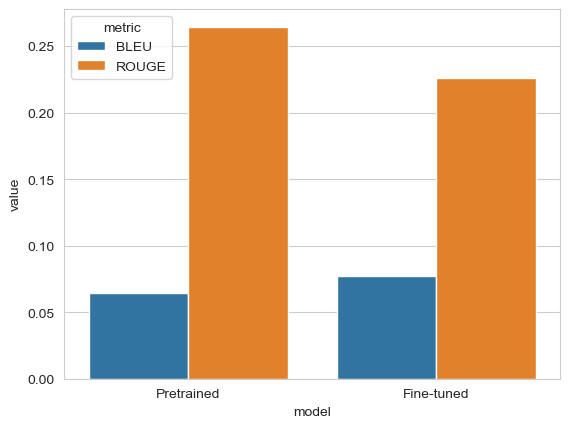

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

bleu_list = [bleu_before["bleu"], bleu_after["bleu"]]
rouge_list = [rouge_before["rougeLsum"], rouge_after["rougeLsum"]]
labels = ["Pretrained", "Fine-tuned"]

metrics_df = pd.DataFrame({"model": labels * 2, "metric": ["BLEU"] * 2 + ["ROUGE"] * 2, "value" : bleu_list + rouge_list})

sns.barplot(data=metrics_df, x="model", y="value", hue="metric")
plt.savefig("metrics.png")
plt.show()

In [64]:
metrics_df

,model,metric,value
0,Pretrained,BLEU,0.064591
1,Fine-tuned,BLEU,0.077152
2,Pretrained,ROUGE,0.264538
3,Fine-tuned,ROUGE,0.225877


По метрикам непонятно улучшилась ли модель после дообучения (BLEU увеличилась, но ROUGE опустилась). Давайте спросим это у самой модели

In [65]:
image = Image.open("metrics.png").convert("RGB")
question = "Does fine-tuned model is better than pretrained model?"
input_prompt = f"<image>\n Question: {question} Answer: "

inputs = processor(text=input_prompt, images=image, return_tensors="pt")

# change type if pixel_values in inputs to fp16. 
inputs['pixel_values'] = inputs['pixel_values'].to(torch.float16)
input_prompt_length = inputs['input_ids'].shape[1]


# Generate
generate_ids = model.generate(**inputs, num_beams=4, max_new_tokens=128)
output_text = processor.batch_decode(generate_ids[:, input_prompt_length:], skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
print(output_text)

C:\Conda\envs\CQA-Solution\Lib\site-packages\transformers\generation\utils.py:1885: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(



No, the fine-tuned model is not better than the pretrained model. The fine-tuned model has a lower accuracy than the pretrained model. This is because the fine-tuned model has not been trained on as large of a dataset as the pretrained model. The pretrained model has been trained on a much larger dataset, which has allowed it to learn more about the task and improve its performance. The fine-tuned model, on the other hand, has only been trained on a smaller dataset, which has limited its ability to learn and improve its performance.


Вывод: у модели низкая самооценка. А ещё она неправильно считала названия метрик с графика.

## Submission

In [66]:
submission = pd.DataFrame({"ID": test_dataset["id"], "prediction": finetuned_predictions})

submission.to_csv("submission.csv", index=False)

## Выводы

Задача дообучения VLM для задачи Chart Question Answering очень интересна, а главное практически применимая. В нашем случае нельзя одназначно сказать улучшили ли мы качество нашей модели (модель считает, что она стала хуже). Возможно дообучение на всём датасете, дообучение на [flash-attention](https://github.com/Dao-AILab/flash-attention) или выбор более мощных моделей, таких как [ChartGemma](https://github.com/vis-nlp/ChartGemma) или ChartPaLi(https://arxiv.org/pdf/2403.12596v1) могут улучшить результат. Но для этого нужна более мощная видеокарта.

Также улучшить качество могло использование так называемых гибридных VLM/LLM. Например, популярной связки [DePlot](https://arxiv.org/pdf/2212.10505v2) + мощной LLM, в которой DePlot представляет информацию с графика в виде таблицы, а LLM на её основе даёт ответы.

Дополнительно хотел отметить хорошую оптимизацию обучения с помощью библиотеки [PEFT](https://huggingface.co/docs/peft/index) и квантинизацию с помощью библиотеки [bitsandbytes](https://huggingface.co/docs/bitsandbytes/index) от Hugging Face.

Надеюсь, что для моего первого раза получилось неплохо. Буду рад получить фидбек.